In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
import scipy as sp
from scipy.optimize import minimize

In [129]:
d = 2 # dimensionalidad
a, b = 0, 1 # rango
c, k = 1, 2
L = np.random.rand(d,d)
cov = np.dot(L,L.transpose())
mean1 = [np.random.uniform(a, b) for i in range(0, d)]
mean2 = [np.random.uniform(c, k) for i in range(0, d)]
data1 = np.random.multivariate_normal(mean1, cov, 1000) #label 0
data2 = np.random.multivariate_normal(mean2, cov, 1000) # label 1

Data1= pd.DataFrame(data1)
Data1['label'] = 1

Data2= pd.DataFrame(data2)
Data2['label'] = 0
Data2

,0,1,label
0,0.812744,0.658690,0
1,2.517773,2.706496,0
2,0.650510,0.494861,0
3,0.242308,-0.044326,0
4,0.864579,0.714940,0
5,-0.771783,-1.257343,0
6,2.374085,2.501664,0
7,1.577855,1.577628,0
8,1.187568,1.065016,0
9,0.578269,0.400565,0


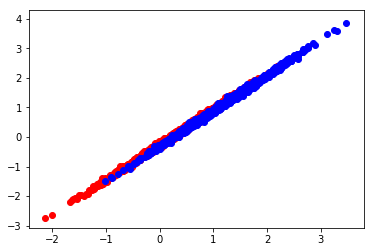

In [130]:
plt.scatter(Data1[0], Data1[1], c='r')
plt.scatter(Data2[0], Data2[1], c='b')
plt.show()

In [131]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [132]:
def get_w(array, y):
    first = (array.T).dot(array)
    inverse = np.linalg.inv(first)
    second = (x_array.T).dot(y)
    return inverse.dot(second)

In [133]:
def get_x(data1 ,data2):
    x1 = list()
    x2 = list()
    x1 = [[1, data[0], data[1]] for data in data1.itertuples()]
    x2 = [[1, data[0], data[1]] for data in data2.itertuples()]
    return np.array(x1+x2)

In [134]:
X = np.concatenate((data1, data2))
s = get_x(Data1, Data2)
np.array(s)
print(s)

[[  1.00000000e+00   0.00000000e+00   1.15579645e+00]
 [  1.00000000e+00   1.00000000e+00   3.53589980e-01]
 [  1.00000000e+00   2.00000000e+00   7.78606238e-01]
 ..., 
 [  1.00000000e+00   9.97000000e+02   2.44921869e+00]
 [  1.00000000e+00   9.98000000e+02   1.18361176e+00]
 [  1.00000000e+00   9.99000000e+02   2.35013183e+00]]


In [149]:
def log_like(W, X, Y):
    result = 0
    for l in Y:
        result += (-np.log(1+np.exp(np.dot(X, W))) + l*(np.dot(X, W)))
    print(result)
    return result
def negative_log(W, X, Y):
    return -log_like(W, X, Y)

In [150]:
log_like(np.array([0,0,0]),np.array(0),np.array(0))

TypeError: iteration over a 0-d array

In [136]:
D = Data1.append(Data2)
labels = D.as_matrix(columns=D.columns[2:])

In [140]:
def negative_log(a,b,c):
    return 1

In [148]:
w = minimize(negative_log, [0,0,0], args=(s, labels), method='BFGS')

ValueError: setting an array element with a sequence.

In [143]:
s.shape

(2000, 3)

In [144]:
labels.shape

(2000, 1)

In [145]:
type(s)

numpy.ndarray

In [146]:
type(labels)

numpy.ndarray